เตรียมข้อมูลอุตุนิยมวิทยา (https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)

ให้เตรียมข้อมูลลักษณะอากาศของแต่ละวัน (แก้ missing, noise, ฯลฯ ) และสร้างตารางเพื่อทำการทำนาย ปริมาณน้ำฝนสำหรับจังหวัดขอนแก่นของวันถัดไป (ปริมาณน้ำฝนขอนแก่นของวันที่ D+1) จากข้อมูลลักษณะอากาศในจังหวัดต่างๆ (ขอนแก่น,หนองคาย,นครพนม,เลย,สกลนคร) ของวันปัจจุบัน (อุณหภูมิตุ้มแห้งขอนแก่นของวันที่ D,...,ความเร็วลมสกลนครของวันที่ D)


ตัวอย่างตารางที่ต้องการ (Xi มีทั้งหมด 5จังหวัด * 8ลักษณะอากาศ = 40 columns และ Y อีก 1 columns)

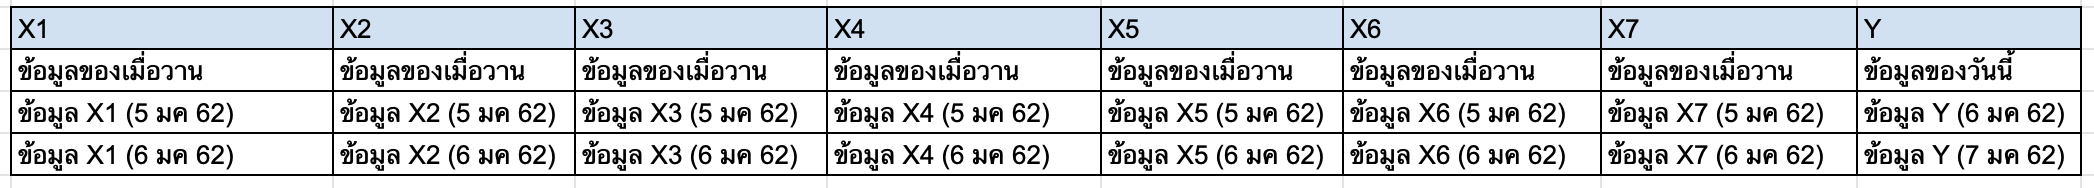

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# X1 ความกด(เปอร์เซ็นต์)


## จัดข้อมูล เพื่อนำไปทำ Function
- เนื่องจากข้อมูลมี Format เดียวกันการทำ Function จะได้ง่ายต่อการเตรียมข้อมูลเริ่มต้น เพราะเป็นการทำงานที่ซ้ำๆ

In [ ]:
import os
import pandas as pd
import numpy as npd

In [ ]:
file_path = "/content/drive/Shareddrives/Utu/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.เลย.xlsx"

In [ ]:
df = pd.read_excel(file_path)

################################################################################

- 1 เป็นการเลือกตั้งแต่ row ที่5 ลงมา และเลือกตั้งแต่ column ที่ 3 จนถึงก่อนสุดท้าย 1 column

In [ ]:
df = df.iloc[4:, 2:34]

In [ ]:
df

,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
4,2011-10-01 00:00:00,23.6,23.5,21.9,21.9,21.8,21.6,21.7,22.6,22.6,...,21.0,21.0,21.5,21.2,21.0,21.6,21.3,21,20.2,20.2
5,2011-11-01 00:00:00,20.1,19.5,19.5,19.1,19.5,20.5,20.6,20.8,20.5,...,20.0,18.6,17.0,16.7,17.5,18.8,19.2,19.5,19.4,-
6,2011-12-01 00:00:00,18,16.6,15.0,14.6,15.3,16.7,18.9,20.2,15.5,...,15.9,16.1,12.8,9.7,9.4,11.0,14.9,16.2,16.2,16.5
7,2012-01-01 00:00:00,16.2,16.4,17.6,18.2,15.2,16.1,17.0,15.0,13.6,...,20.0,20.6,18.7,18.5,16.9,17.6,18.5,19.2,18.2,17.4
8,2012-02-01 00:00:00,17.8,18.8,20.7,19.1,19.5,18.2,16.4,16.4,17.9,...,15.7,15.0,16.3,17.1,16.7,18.7,18.6,16.9,-,-
9,2012-10-01 00:00:00,22.1,21.9,22.4,23.1,23.4,23.2,22.2,21.7,22.1,...,21.9,20.7,20.6,21.0,21.1,21.3,20.8,21.8,21.7,20.2
10,2012-11-01 00:00:00,26.1,25.3,26.2,26.2,26.9,27.3,27.8,27.9,28.1,...,26.7,27.4,25.8,26.3,26.6,25.6,25.2,25.8,26.7,-
11,2012-12-01 00:00:00,27.6,27.6,25.8,26.6,26.4,25.4,24.9,25.3,24.9,...,24.4,24.6,21.4,21.4,23.0,24.6,24.4,24.6,24.4,20.3
12,2013-01-01 00:00:00,13.1,15.5,16.1,15.6,15.3,15.0,15.3,16.3,17.1,...,14.3,16.6,18.3,18.4,18.7,19.4,18.0,18.4,18,19.2
13,2013-02-01 00:00:00,18.2,19.0,18.2,17.9,17.9,19.0,17.5,15.6,17.8,...,16.1,13.6,13.9,16.8,18.3,18.6,20.1,-,-,-


- 2 ทำการแปลงคอลัมน์ที่มีข้อมูลวันที่-เวลา ที่มีให้อยู่ในรูปแบบของ Pandas DateTime

In [ ]:
df[df.columns[0]] = pd.to_datetime(df.iloc[:, 0])

In [ ]:
df

,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
4,2011-10-01,23.6,23.5,21.9,21.9,21.8,21.6,21.7,22.6,22.6,...,21.0,21.0,21.5,21.2,21.0,21.6,21.3,21,20.2,20.2
5,2011-11-01,20.1,19.5,19.5,19.1,19.5,20.5,20.6,20.8,20.5,...,20.0,18.6,17.0,16.7,17.5,18.8,19.2,19.5,19.4,-
6,2011-12-01,18,16.6,15.0,14.6,15.3,16.7,18.9,20.2,15.5,...,15.9,16.1,12.8,9.7,9.4,11.0,14.9,16.2,16.2,16.5
7,2012-01-01,16.2,16.4,17.6,18.2,15.2,16.1,17.0,15.0,13.6,...,20.0,20.6,18.7,18.5,16.9,17.6,18.5,19.2,18.2,17.4
8,2012-02-01,17.8,18.8,20.7,19.1,19.5,18.2,16.4,16.4,17.9,...,15.7,15.0,16.3,17.1,16.7,18.7,18.6,16.9,-,-
9,2012-10-01,22.1,21.9,22.4,23.1,23.4,23.2,22.2,21.7,22.1,...,21.9,20.7,20.6,21.0,21.1,21.3,20.8,21.8,21.7,20.2
10,2012-11-01,26.1,25.3,26.2,26.2,26.9,27.3,27.8,27.9,28.1,...,26.7,27.4,25.8,26.3,26.6,25.6,25.2,25.8,26.7,-
11,2012-12-01,27.6,27.6,25.8,26.6,26.4,25.4,24.9,25.3,24.9,...,24.4,24.6,21.4,21.4,23.0,24.6,24.4,24.6,24.4,20.3
12,2013-01-01,13.1,15.5,16.1,15.6,15.3,15.0,15.3,16.3,17.1,...,14.3,16.6,18.3,18.4,18.7,19.4,18.0,18.4,18,19.2
13,2013-02-01,18.2,19.0,18.2,17.9,17.9,19.0,17.5,15.6,17.8,...,16.1,13.6,13.9,16.8,18.3,18.6,20.1,-,-,-


- 3 แปลงข้อมูล Pandas DateTime ให้อยู่ในรูป ปี/เดือน

In [ ]:
df.iloc[:, 0] = df.iloc[:, 0].dt.to_period('M')

In [ ]:
df

,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
4,2011-10,23.6,23.5,21.9,21.9,21.8,21.6,21.7,22.6,22.6,...,21.0,21.0,21.5,21.2,21.0,21.6,21.3,21,20.2,20.2
5,2011-11,20.1,19.5,19.5,19.1,19.5,20.5,20.6,20.8,20.5,...,20.0,18.6,17.0,16.7,17.5,18.8,19.2,19.5,19.4,-
6,2011-12,18,16.6,15.0,14.6,15.3,16.7,18.9,20.2,15.5,...,15.9,16.1,12.8,9.7,9.4,11.0,14.9,16.2,16.2,16.5
7,2012-01,16.2,16.4,17.6,18.2,15.2,16.1,17.0,15.0,13.6,...,20.0,20.6,18.7,18.5,16.9,17.6,18.5,19.2,18.2,17.4
8,2012-02,17.8,18.8,20.7,19.1,19.5,18.2,16.4,16.4,17.9,...,15.7,15.0,16.3,17.1,16.7,18.7,18.6,16.9,-,-
9,2012-10,22.1,21.9,22.4,23.1,23.4,23.2,22.2,21.7,22.1,...,21.9,20.7,20.6,21.0,21.1,21.3,20.8,21.8,21.7,20.2
10,2012-11,26.1,25.3,26.2,26.2,26.9,27.3,27.8,27.9,28.1,...,26.7,27.4,25.8,26.3,26.6,25.6,25.2,25.8,26.7,-
11,2012-12,27.6,27.6,25.8,26.6,26.4,25.4,24.9,25.3,24.9,...,24.4,24.6,21.4,21.4,23.0,24.6,24.4,24.6,24.4,20.3
12,2013-01,13.1,15.5,16.1,15.6,15.3,15.0,15.3,16.3,17.1,...,14.3,16.6,18.3,18.4,18.7,19.4,18.0,18.4,18,19.2
13,2013-02,18.2,19.0,18.2,17.9,17.9,19.0,17.5,15.6,17.8,...,16.1,13.6,13.9,16.8,18.3,18.6,20.1,-,-,-


- 4 setให้คอลัมน์ที่ 0 ใน DataFrame กลายเป็น index ของ DataFrame

In [ ]:
df.set_index(df.columns[0], inplace=True)

In [ ]:
df

,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
Unnamed: 2,,,,,,,,,,,,,,,,,,,,,
2011-10,23.6,23.5,21.9,21.9,21.8,21.6,21.7,22.6,22.6,22.4,...,21.0,21.0,21.5,21.2,21.0,21.6,21.3,21,20.2,20.2
2011-11,20.1,19.5,19.5,19.1,19.5,20.5,20.6,20.8,20.5,18.9,...,20.0,18.6,17.0,16.7,17.5,18.8,19.2,19.5,19.4,-
2011-12,18,16.6,15.0,14.6,15.3,16.7,18.9,20.2,15.5,14.0,...,15.9,16.1,12.8,9.7,9.4,11.0,14.9,16.2,16.2,16.5
2012-01,16.2,16.4,17.6,18.2,15.2,16.1,17.0,15.0,13.6,13.7,...,20.0,20.6,18.7,18.5,16.9,17.6,18.5,19.2,18.2,17.4
2012-02,17.8,18.8,20.7,19.1,19.5,18.2,16.4,16.4,17.9,19.3,...,15.7,15.0,16.3,17.1,16.7,18.7,18.6,16.9,-,-
2012-10,22.1,21.9,22.4,23.1,23.4,23.2,22.2,21.7,22.1,21.6,...,21.9,20.7,20.6,21.0,21.1,21.3,20.8,21.8,21.7,20.2
2012-11,26.1,25.3,26.2,26.2,26.9,27.3,27.8,27.9,28.1,28.4,...,26.7,27.4,25.8,26.3,26.6,25.6,25.2,25.8,26.7,-
2012-12,27.6,27.6,25.8,26.6,26.4,25.4,24.9,25.3,24.9,24.5,...,24.4,24.6,21.4,21.4,23.0,24.6,24.4,24.6,24.4,20.3
2013-01,13.1,15.5,16.1,15.6,15.3,15.0,15.3,16.3,17.1,14.7,...,14.3,16.6,18.3,18.4,18.7,19.4,18.0,18.4,18,19.2


In [ ]:
import pandas as pd
import numpy as np

def replace_dash_and_nan_with_mean(row):
    # Replace "T" with 0.001, "nan" with np.nan, and dashes with np.nan
    cleaned_row = row.replace(['T', 'nan', '-'], [0.001, np.nan, np.nan])

    # Convert to numeric values
    numeric_values = pd.to_numeric(cleaned_row, errors='coerce')

    # Calculate the mean of numeric values, excluding NaNs
    mean_value = np.nanmean(numeric_values)

    # Replace dashes and NaN with the calculated mean
    row = row.replace(['T', 'nan', '-'], [f'{mean_value:.3f}', f'{mean_value:.3f}', f'{mean_value:.3f}'])
    return row

# Assuming df is your DataFrame
df = df.apply(replace_dash_and_nan_with_mean, axis=1)


In [ ]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
def replace_dash_and_nan_with_mean(row):
    numeric_values = pd.to_numeric(row.replace(['-', np.nan], [np.nan, np.nan]))
    mean_value = numeric_values.mean()
    row = row.replace(['-', np.nan], [f'{mean_value:.2f}', f'{mean_value:.2f}'])
    return row

df = df.apply(replace_dash_and_nan_with_mean, axis=1)


In [ ]:
df

,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
Unnamed: 2,,,,,,,,,,,,,,,,,,,,,
2011-10,23.6,23.5,21.9,21.9,21.8,21.6,21.7,22.6,22.6,22.4,...,21.0,21.0,21.5,21.2,21.0,21.6,21.3,21.0,20.2,20.2
2011-11,20.1,19.5,19.5,19.1,19.5,20.5,20.6,20.8,20.5,18.9,...,20.0,18.6,17.0,16.7,17.5,18.8,19.2,19.5,19.4,18.953
2011-12,18.0,16.6,15.0,14.6,15.3,16.7,18.9,20.2,15.5,14.0,...,15.9,16.1,12.8,9.7,9.4,11.0,14.9,16.2,16.2,16.5
2012-01,16.2,16.4,17.6,18.2,15.2,16.1,17.0,15.0,13.6,13.7,...,20.0,20.6,18.7,18.5,16.9,17.6,18.5,19.2,18.2,17.4
2012-02,17.8,18.8,20.7,19.1,19.5,18.2,16.4,16.4,17.9,19.3,...,15.7,15.0,16.3,17.1,16.7,18.7,18.6,16.9,17.310,17.310
2012-10,22.1,21.9,22.4,23.1,23.4,23.2,22.2,21.7,22.1,21.6,...,21.9,20.7,20.6,21.0,21.1,21.3,20.8,21.8,21.7,20.2
2012-11,26.1,25.3,26.2,26.2,26.9,27.3,27.8,27.9,28.1,28.4,...,26.7,27.4,25.8,26.3,26.6,25.6,25.2,25.8,26.7,26.737
2012-12,27.6,27.6,25.8,26.6,26.4,25.4,24.9,25.3,24.9,24.5,...,24.4,24.6,21.4,21.4,23.0,24.6,24.4,24.6,24.4,20.3
2013-01,13.1,15.5,16.1,15.6,15.3,15.0,15.3,16.3,17.1,14.7,...,14.3,16.6,18.3,18.4,18.7,19.4,18.0,18.4,18.0,19.2


- 5 กำหนดชื่อคอลัมน์ โดยให้ลำดับของตัวเลขที่เริ่มต้นที่ 1 และสิ้นสุดที่จำนวนคอลัมน์ของ DataFrame

In [ ]:
df.columns = range(1, df.shape[1] + 1)

In [ ]:
df

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
Unnamed: 2,,,,,,,,,,,,,,,,,,,,,
2011-10,23.6,23.5,21.9,21.9,21.8,21.6,21.7,22.6,22.6,22.4,...,21.0,21.0,21.5,21.2,21.0,21.6,21.3,21.0,20.2,20.2
2011-11,20.1,19.5,19.5,19.1,19.5,20.5,20.6,20.8,20.5,18.9,...,20.0,18.6,17.0,16.7,17.5,18.8,19.2,19.5,19.4,18.953
2011-12,18.0,16.6,15.0,14.6,15.3,16.7,18.9,20.2,15.5,14.0,...,15.9,16.1,12.8,9.7,9.4,11.0,14.9,16.2,16.2,16.5
2012-01,16.2,16.4,17.6,18.2,15.2,16.1,17.0,15.0,13.6,13.7,...,20.0,20.6,18.7,18.5,16.9,17.6,18.5,19.2,18.2,17.4
2012-02,17.8,18.8,20.7,19.1,19.5,18.2,16.4,16.4,17.9,19.3,...,15.7,15.0,16.3,17.1,16.7,18.7,18.6,16.9,17.310,17.310
2012-10,22.1,21.9,22.4,23.1,23.4,23.2,22.2,21.7,22.1,21.6,...,21.9,20.7,20.6,21.0,21.1,21.3,20.8,21.8,21.7,20.2
2012-11,26.1,25.3,26.2,26.2,26.9,27.3,27.8,27.9,28.1,28.4,...,26.7,27.4,25.8,26.3,26.6,25.6,25.2,25.8,26.7,26.737
2012-12,27.6,27.6,25.8,26.6,26.4,25.4,24.9,25.3,24.9,24.5,...,24.4,24.6,21.4,21.4,23.0,24.6,24.4,24.6,24.4,20.3
2013-01,13.1,15.5,16.1,15.6,15.3,15.0,15.3,16.3,17.1,14.7,...,14.3,16.6,18.3,18.4,18.7,19.4,18.0,18.4,18.0,19.2


- 6 ทำการ stack คอลัมน์ ของ DataFrame และเปลี่ยนชื่อคอลัมน์ของ DataFrame แถวที่ถูก stack จะถูกเปลี่ยนชื่อเป็น 'day' และคอลัมน์ที่มีค่าในแนวนอนจะถูกเปลี่ยนชื่อเป็น 'value'

In [ ]:
df_long = df.stack().reset_index().rename(columns={'level_1': 'day', 0: 'value'})

In [ ]:
df_long

,Unnamed: 2,day,value
0,2011-10,1,23.6
1,2011-10,2,23.5
2,2011-10,3,21.9
3,2011-10,4,21.9
4,2011-10,5,21.8
...,...,...,...
1545,2021-02,27,13.8
1546,2021-02,28,15.2
1547,2021-02,29,15.782
1548,2021-02,30,15.782


- 7 เปลี่ยนชื่อคอลัมน์ที่อยู่ที่ตำแหน่งที่ 0 (คอลัมน์แรก) เป็น 'year/month'

In [ ]:
df_long.rename(columns={df_long.columns[0]: 'year/month'}, inplace=True)

In [ ]:
df_long

,year/month,day,value
0,2011-10,1,23.6
1,2011-10,2,23.5
2,2011-10,3,21.9
3,2011-10,4,21.9
4,2011-10,5,21.8
...,...,...,...
1545,2021-02,27,13.8
1546,2021-02,28,15.2
1547,2021-02,29,15.782
1548,2021-02,30,15.782


### นำมาทำเป็น Fuction เพื่อจัดการข้อมูลทุกไฟล์(ทุกจังหวัด) ใน Folder ความกด(เปอร์เซ็นต์)
- โดย X1 คือ ความกด(เปอร์เซ็นต์)

---



In [ ]:
import pandas as pd
import os
import numpy as np

X1_path = "/content/drive/Shareddrives/Utu/ความกด(เปอร์เซ็นต์)"

file_order = [
    "จ.ขอนแก่น.xlsx",
    "จ.นครพนม.xlsx",
    "จ.เลย.xlsx",
    "จ.สกลนคร.xlsx",
    "จ.หนองคาย.xlsx",
]

def replace_dash_with_mean(row):
    if '-' in row.values:
        numeric_values = pd.to_numeric(row.replace('-', np.nan), errors='coerce')
        mean_value = numeric_values.mean()
        row[row == '-'] = f'{mean_value:.2f}'
    return row

def process_excel_files(Phuris):
    processed_dfs = []

    for filename in file_order:
        file_path = os.path.join(Phuris, filename)

        if os.path.exists(file_path) and filename.endswith(".xlsx"):
            df = pd.read_excel(file_path)
            df = df.iloc[4:, 2:-1].copy()    #1
            df[df.columns[0]] = pd.to_datetime(df.iloc[:, 0]).copy()   #2
            df[df.columns[0]] = df[df.columns[0]].dt.to_period('M').copy()   #3
            df.set_index(df.columns[0], inplace=True)  #4
            df.columns = range(1, df.shape[1] + 1)    #5
            df_long = df.stack().reset_index().rename(columns={'level_1': 'date', 0: 'X1'})    #6
            df_long.rename(columns={df_long.columns[0]: 'year/month'}, inplace=True)    #7

            # Replace dash values with the mean in each row
            df_long = df_long.apply(replace_dash_with_mean, axis=1)

            # Add 'province' column and fill it with the province name
            province_name = os.path.splitext(filename)[0]
            df_long['province'] = province_name

            processed_dfs.append(df_long)

    final_df = pd.concat(processed_dfs, ignore_index=True)

    return final_df

X1_result = process_excel_files(X1_path)
# Display the dataframe
X1_result


,year/month,date,X1,province
0,2011-10,1,1005.47,จ.ขอนแก่น
1,2011-10,2,1006.65,จ.ขอนแก่น
2,2011-10,3,1007.49,จ.ขอนแก่น
3,2011-10,4,1008.28,จ.ขอนแก่น
4,2011-10,5,1009.88,จ.ขอนแก่น
...,...,...,...,...
8520,2022-02,27,1015.31,จ.หนองคาย
8521,2022-02,28,1013.06,จ.หนองคาย
8522,2022-02,29,29.00,จ.หนองคาย
8523,2022-02,30,30.00,จ.หนองคาย


- check ค่า null

In [ ]:
# กรองแถวที่มีค่า null
null_values = X1_result[X1_result.isnull().any(axis=1)]

# แสดงผลลัพธ์
print(null_values)


Empty DataFrame
Columns: [year/month, date, X1, province]
Index: []


# X2 ความชื้นสัมพัทธ์(เปอร์เซ็นต์)

- เนื่องจาก format ของข้อมูลเหมือนกัน จึงใช้ Fuctionเดิม เพื่อจัดการข้อมูลทุกไฟล์ใน Folder ความชื้นสัมพัทธ์(เปอร์เซ็นต์)
- โดย X2 คือ ความชื้นสัมพัทธ์(เปอร์เซ็นต์)

In [ ]:
import pandas as pd
import os
import numpy as np

X2_path = "/content/drive/Shareddrives/Utu/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)"

file_order = [
    "จ.ขอนแก่น.xlsx",
    "จ.นครพนม.xlsx",
    "จ.เลย.xlsx",
    "จ.สกลนคร.xlsx",
    "จ.หนองคาย.xlsx",
]

def replace_dash_with_mean(row):
    if '-' in row.values:
        numeric_values = pd.to_numeric(row.replace('-', np.nan), errors='coerce')
        mean_value = numeric_values.mean()
        row[row == '-'] = f'{mean_value:.2f}'
    return row

def process_excel_files(Phuris):
    processed_dfs = []

    for filename in file_order:
        file_path = os.path.join(Phuris, filename)

        if os.path.exists(file_path) and filename.endswith(".xlsx"):
            df = pd.read_excel(file_path)
            df = df.iloc[4:, 2:34].copy()    #1
            df[df.columns[0]] = pd.to_datetime(df.iloc[:, 0]).copy()   #2
            df[df.columns[0]] = df[df.columns[0]].dt.to_period('M').copy()   #3
            df.set_index(df.columns[0], inplace=True)  #4
            df.columns = range(1, df.shape[1] + 1)    #5
            df_long = df.stack().reset_index().rename(columns={'level_1': 'date', 0: 'X2'})    #6
            df_long.rename(columns={df_long.columns[0]: 'year/month'}, inplace=True)    #7

            # Replace dash values with the mean in each row
            df_long = df_long.apply(replace_dash_with_mean, axis=1)

            # Add 'province' column and fill it with the province name
            province_name = os.path.splitext(filename)[0]
            df_long['province'] = province_name

            processed_dfs.append(df_long)

    final_df = pd.concat(processed_dfs, ignore_index=True)

    return final_df

X2_result = process_excel_files(X2_path)
# Display the dataframe
X2_result


,year/month,date,X2,province
0,2011-10,1,83,จ.ขอนแก่น
1,2011-10,2,92.0,จ.ขอนแก่น
2,2011-10,3,86.0,จ.ขอนแก่น
3,2011-10,4,80.0,จ.ขอนแก่น
4,2011-10,5,86.0,จ.ขอนแก่น
...,...,...,...,...
8520,2022-02,27,62.0,จ.หนองคาย
8521,2022-02,28,65.0,จ.หนองคาย
8522,2022-02,29,29.00,จ.หนองคาย
8523,2022-02,30,30.00,จ.หนองคาย


- check ค่า null

In [ ]:
# กรองแถวที่มีค่า null
null_values = X2_result[X2_result.isnull().any(axis=1)]

# แสดงผลลัพธ์
print(null_values)

Empty DataFrame
Columns: [year/month, date, X2, province]
Index: []


# X3 ความเร็วลม(นอต)

- เนื่องจาก format ของข้อมูลเหมือนกัน จึงใช้ Fuctionเดิม เพื่อจัดการข้อมูลทุกไฟล์ใน Folder ความเร็วลม(นอต)
- โดย X3 คือ ความเร็วลม(นอต)

In [ ]:
import pandas as pd
import os
import numpy as np

X3_path = "/content/drive/Shareddrives/Utu/ความเร็วลม(นอต)"

file_order = [
    "จ.ขอนแก่น.xlsx",
    "จ.นครพนม.xlsx",
    "จ.เลย.xlsx",
    "จ.สกลนคร.xlsx",
    "จ.หนองคาย.xlsx",
]

def replace_dash_with_mean(row):
    if '-' in row.values:
        numeric_values = pd.to_numeric(row.replace(['-', np.nan], [np.nan, np.nan]), errors='coerce')
        mean_value = numeric_values.mean()
        row = row.replace(['-', np.nan], [f'{mean_value:.2f}', f'{mean_value:.2f}'])
    return row


def process_excel_files(Phuris):
    processed_dfs = []

    for filename in file_order:
        file_path = os.path.join(Phuris, filename)

        if os.path.exists(file_path) and filename.endswith(".xlsx"):
            df = pd.read_excel(file_path)
            df = df.iloc[4:, 2:34].copy()    #1
            df[df.columns[0]] = pd.to_datetime(df.iloc[:, 0]).copy()   #2
            df[df.columns[0]] = df[df.columns[0]].dt.to_period('M').copy()   #3
            df.set_index(df.columns[0], inplace=True)  #4
            df.columns = range(1, df.shape[1] + 1)    #5
            df_long = df.stack().reset_index().rename(columns={'level_1': 'date', 0: 'X3'})    #6
            df_long.rename(columns={df_long.columns[0]: 'year/month'}, inplace=True)    #7

            # Replace dash values with the mean in each row
            df_long = df_long.apply(replace_dash_with_mean, axis=1)

            # Add 'province' column and fill it with the province name
            province_name = os.path.splitext(filename)[0]
            df_long['province'] = province_name

            processed_dfs.append(df_long)

    final_df = pd.concat(processed_dfs, ignore_index=True)

    return final_df

X3_result = process_excel_files(X3_path)
# Display the dataframe
X3_result


,year/month,date,X3,province
0,2011-10,1,3,จ.ขอนแก่น
1,2011-10,2,2.0,จ.ขอนแก่น
2,2011-10,3,3,จ.ขอนแก่น
3,2011-10,4,2.0,จ.ขอนแก่น
4,2011-10,5,2.0,จ.ขอนแก่น
...,...,...,...,...
8520,2022-02,27,2.0,จ.หนองคาย
8521,2022-02,28,2.0,จ.หนองคาย
8522,2022-02,29,29.00,จ.หนองคาย
8523,2022-02,30,30.00,จ.หนองคาย


- check ค่า null

In [ ]:
# กรองแถวที่มีค่า null
null_values = X3_result[X3_result.isnull().any(axis=1)]

# แสดงผลลัพธ์
print(null_values)

Empty DataFrame
Columns: [year/month, date, X3, province]
Index: []


# X4 จำนวนเมฆ(10ส่วน)

- เนื่องจาก format ของข้อมูลเหมือนกัน จึงใช้ Fuctionเดิม เพื่อจัดการข้อมูลทุกไฟล์ใน Folder จำนวนเมฆ(10ส่วน)
- โดย X4 คือ จำนวนเมฆ(10ส่วน)

In [ ]:
import pandas as pd
import os
import numpy as np

X4_path = "/content/drive/Shareddrives/Utu/จำนวนเมฆ(10ส่วน)"

file_order = [
    "จ.ขอนแก่น.xlsx",
    "จ.นครพนม.xlsx",
    "จ.เลย.xlsx",
    "จ.สกลนคร.xlsx",
    "จ.หนองคาย.xlsx",
]

def replace_dash_with_mean(row):
    if '-' in row.values:
        numeric_values = pd.to_numeric(row.replace(['-', np.nan], [np.nan, np.nan]), errors='coerce')
        mean_value = numeric_values.mean()
        row = row.replace(['-', np.nan], [f'{mean_value:.2f}', f'{mean_value:.2f}'])
    return row

def process_excel_files(Phuris):
    processed_dfs = []

    for filename in file_order:
        file_path = os.path.join(Phuris, filename)

        if os.path.exists(file_path) and filename.endswith(".xlsx"):
            df = pd.read_excel(file_path)
            df = df.iloc[4:, 2:34].copy()    #1
            df[df.columns[0]] = pd.to_datetime(df.iloc[:, 0]).copy()   #2
            df[df.columns[0]] = df[df.columns[0]].dt.to_period('M').copy()   #3
            df.set_index(df.columns[0], inplace=True)  #4
            df.columns = range(1, df.shape[1] + 1)    #5

            # Replace dash values with the mean in each row
            df = df.apply(replace_dash_with_mean, axis=1)  # Apply after setting the index

            df_long = df.stack().reset_index().rename(columns={'level_1': 'date', 0: 'X4'})    #6
            df_long.rename(columns={df_long.columns[0]: 'year/month'}, inplace=True)    #7

            # Add 'province' column and fill it with the province name
            province_name = os.path.splitext(filename)[0]
            df_long['province'] = province_name

            processed_dfs.append(df_long)

    final_df = pd.concat(processed_dfs, ignore_index=True)

    return final_df

X4_result = process_excel_files(X4_path)
# Display the dataframe
X4_result


,year/month,date,X4,province
0,2011-10,1,9,จ.ขอนแก่น
1,2011-10,2,10.0,จ.ขอนแก่น
2,2011-10,3,10,จ.ขอนแก่น
3,2011-10,4,8.0,จ.ขอนแก่น
4,2011-10,5,10.0,จ.ขอนแก่น
...,...,...,...,...
8520,2022-02,27,3,จ.หนองคาย
8521,2022-02,28,2,จ.หนองคาย
8522,2022-02,29,1,จ.หนองคาย
8523,2022-02,30,1,จ.หนองคาย


- check ค่า null

In [ ]:
duplicate_rows = X4_result[X4_result.duplicated()]
duplicate_rows

,year/month,date,X4,province


In [ ]:
non_numeric_rows = X4_result[pd.to_numeric(X4_result['X4'], errors='coerce').isna()]
non_numeric_rows

,year/month,date,X4,province


In [ ]:
# กรองแถวที่มีค่า null
null_values = X4_result[X4_result.isnull().any(axis=1)]

# แสดงผลลัพธ์
print(null_values)

Empty DataFrame
Columns: [year/month, date, X4, province]
Index: []


# X5 อุณหภูมิจุดน้ำค้าง(เซลเซียส)

- เนื่องจาก format ของข้อมูลเหมือนกัน จึงใช้ Fuctionเดิม เพื่อจัดการข้อมูลทุกไฟล์ใน Folder อุณหภูมิจุดน้ำค้าง(เซลเซียส)
- โดย X5 คือ อุณหภูมิจุดน้ำค้าง(เซลเซียส)

In [ ]:
import pandas as pd
import os
import numpy as np

X5_path = "/content/drive/Shareddrives/Utu/อุณหภูมิจุดน้ำค้าง(เซลเซียส)"

file_order = [
    "จ.ขอนแก่น.xlsx",
    "จ.นครพนม.xlsx",
    "จ.เลย.xlsx",
    "จ.สกล.xlsx",
    "จ.หนองคาย.xlsx",
]

def replace_dash_with_mean(row):
    if '-' in row.values:
        numeric_values = pd.to_numeric(row.replace(['-', np.nan], [np.nan, np.nan]), errors='coerce')
        mean_value = numeric_values.mean()
        row = row.replace(['-', np.nan], [f'{mean_value:.2f}', f'{mean_value:.2f}'])
    return row

def process_excel_files(Phuris):
    processed_dfs = []

    for filename in file_order:
        file_path = os.path.join(Phuris, filename)

        if os.path.exists(file_path) and filename.endswith(".xlsx"):
            df = pd.read_excel(file_path)
            df = df.iloc[4:, 2:34].copy()
            df[df.columns[0]] = pd.to_datetime(df.iloc[:, 0]).copy()
            df[df.columns[0]] = df[df.columns[0]].dt.to_period('M').copy()
            df.set_index(df.columns[0], inplace=True)
            df.columns = range(1, df.shape[1] + 1)
            df_long = df.stack().reset_index().rename(columns={'level_1': 'date', 0: 'X5'})
            df_long.rename(columns={df_long.columns[0]: 'year/month'}, inplace=True)

            # Replace dash values and NaN with the mean in each row
            df_long = df_long.apply(replace_dash_with_mean, axis=1)

            # Add 'province' column and fill it with the province name
            province_name = os.path.splitext(filename)[0]
            df_long['province'] = province_name

            processed_dfs.append(df_long)

    final_df = pd.concat(processed_dfs, ignore_index=True)

    return final_df

X5_result = process_excel_files(X5_path)
# Display the dataframe
X5_result


,year/month,date,X5,province
0,2011-10,1,24.2,จ.ขอนแก่น
1,2011-10,2,24.0,จ.ขอนแก่น
2,2011-10,3,22.9,จ.ขอนแก่น
3,2011-10,4,21.9,จ.ขอนแก่น
4,2011-10,5,21.7,จ.ขอนแก่น
...,...,...,...,...
8364,2022-02,27,15.8,จ.หนองคาย
8365,2022-02,28,17.8,จ.หนองคาย
8366,2022-02,29,16.6,จ.หนองคาย
8367,2022-02,30,14.9,จ.หนองคาย


- check ค่า null

In [ ]:
non_numeric_rows = X5_result[pd.to_numeric(X5_result['X5'], errors='coerce').isna()]
print(non_numeric_rows)

Empty DataFrame
Columns: [year/month, date, X5, province]
Index: []


In [ ]:
has_nan_values = X5_result['X5'].isna().any()
print(has_nan_values)

False


In [ ]:
# กรองแถวที่มีค่า null
null_values = X5_result[X5_result.isnull().any(axis=1)]

# แสดงผลลัพธ์
print(null_values)

Empty DataFrame
Columns: [year/month, date, X5, province]
Index: []


เปลี่ยน คำว่า จ.สกล เป็น จ.สกลนคร

In [ ]:
X5_result['province'] = X5_result['province'].replace('จ.สกล', 'จ.สกลนคร')

# X6 อุณหภูมิต่ำสุด(เซลเซียส)

- เนื่องจาก format ของข้อมูลเหมือนกัน จึงใช้ Fuctionเดิม เพื่อจัดการข้อมูลทุกไฟล์ใน Folder อุณหภูมิต่ำสุด(เซลเซียส)
- โดย X7 คือ อุณหภูมิต่ำสุด(เซลเซียส)

In [ ]:
import pandas as pd
import os
import numpy as np

X6_path = "/content/drive/Shareddrives/Utu/อุณหภูมิต่ำสุด(เซลเซียส)"

file_order = [
    "จ.ขอนแก่น.xlsx",
    "จ.นครพนม.xlsx",
    "จ.เลย.xlsx",
    "จ.สกล.xlsx",
    "จ.หนองคาย.xlsx",
]

def replace_dash_and_nan_with_mean(row):
    numeric_values = pd.to_numeric(row.replace(['-', np.nan], [np.nan, np.nan]), errors='coerce')
    mean_value = numeric_values.mean()
    row = row.replace(['-', np.nan], [f'{mean_value:.2f}', f'{mean_value:.2f}'])
    return row

def process_excel_files(Phuris):
    processed_dfs = []

    for filename in file_order:
        file_path = os.path.join(Phuris, filename)

        if os.path.exists(file_path) and filename.endswith(".xlsx"):
            df = pd.read_excel(file_path)
            df = df.iloc[4:, 2:34].copy()    #1
            df[df.columns[0]] = pd.to_datetime(df.iloc[:, 0]).copy()   #2
            df[df.columns[0]] = df[df.columns[0]].dt.to_period('M').copy()   #3
            df.set_index(df.columns[0], inplace=True)  #4
            df.columns = range(1, df.shape[1] + 1)    #5
            df_long = df.stack().reset_index().rename(columns={'level_1': 'date', 0: 'X6'})    #6
            df_long.rename(columns={df_long.columns[0]: 'year/month'}, inplace=True)    #7

            # Replace dash values with the mean in each row
            df_long = df_long.apply(replace_dash_with_mean, axis=1)

            # Add 'province' column and fill it with the province name
            province_name = os.path.splitext(filename)[0]
            df_long['province'] = province_name

            processed_dfs.append(df_long)

    final_df = pd.concat(processed_dfs, ignore_index=True)

    return final_df

X6_result = process_excel_files(X6_path)
# Display the dataframe
X6_result


,year/month,date,X6,province
0,2011-10,1,24.8,จ.ขอนแก่น
1,2011-10,2,23.0,จ.ขอนแก่น
2,2011-10,3,22.1,จ.ขอนแก่น
3,2011-10,4,22.8,จ.ขอนแก่น
4,2011-10,5,23.1,จ.ขอนแก่น
...,...,...,...,...
8520,2022-02,27,17.5,จ.หนองคาย
8521,2022-02,28,19,จ.หนองคาย
8522,2022-02,29,29.00,จ.หนองคาย
8523,2022-02,30,30.00,จ.หนองคาย


- check ค่า null

In [ ]:
non_numeric_rows = X6_result[pd.to_numeric(X6_result['X6'], errors='coerce').isna()]
non_numeric_rows

,year/month,date,X6,province


In [ ]:
# กรองแถวที่มีค่า null
null_values = X6_result[X6_result.isnull().any(axis=1)]

# แสดงผลลัพธ์
print(null_values)

Empty DataFrame
Columns: [year/month, date, X6, province]
Index: []


เปลี่ยน คำว่า จ.สกล เป็น จ.สกลนคร

In [ ]:
X6_result['province'] = X6_result['province'].replace('จ.สกล', 'จ.สกลนคร')

# X7 อุณหภูมิตุ้มแห้ง(เซลเซียส)

- เนื่องจาก format ของข้อมูลเหมือนกัน จึงใช้ Fuctionเดิม เพื่อจัดการข้อมูลทุกไฟล์ใน Folder อุณหภูมิตุ้มแห้ง(เซลเซียส)
- โดย X7 คือ อุณหภูมิตุ้มแห้ง(เซลเซียส)

In [ ]:
import pandas as pd
import os
import numpy as np

X7_path = "/content/drive/Shareddrives/Utu/อุณหภูมิตุ้มแห้ง(เซลเซียส)"

file_order = [
    "จ.ขอนแก่น.xlsx",
    "จ.นครพนม.xlsx",
    "จ.เลย.xlsx",
    "จ.สกล.xlsx",
    "จ.หนองคาย.xlsx",
]

def replace_dash_and_nan_with_mean(row):
    numeric_values = pd.to_numeric(row.replace(['-', np.nan], [np.nan, np.nan]), errors='coerce')
    mean_value = numeric_values.mean()
    row = row.replace(['-', np.nan], [f'{mean_value:.2f}', f'{mean_value:.2f}'])
    return row

def process_excel_files(Phuris):
    processed_dfs = []

    for filename in file_order:
        file_path = os.path.join(Phuris, filename)

        if os.path.exists(file_path) and filename.endswith(".xlsx"):
            df = pd.read_excel(file_path)
            df = df.iloc[4:, 2:34].copy()    #1
            df[df.columns[0]] = pd.to_datetime(df.iloc[:, 0]).copy()   #2
            df[df.columns[0]] = df[df.columns[0]].dt.to_period('M').copy()   #3
            df.set_index(df.columns[0], inplace=True)  #4
            df.columns = range(1, df.shape[1] + 1)    #5
            df_long = df.stack().reset_index().rename(columns={'level_1': 'date', 0: 'X7'})    #6
            df_long.rename(columns={df_long.columns[0]: 'year/month'}, inplace=True)    #7

            # Replace dash values with the mean in each row
            df_long = df_long.apply(replace_dash_with_mean, axis=1)

            # Add 'province' column and fill it with the province name
            province_name = os.path.splitext(filename)[0]
            df_long['province'] = province_name

            processed_dfs.append(df_long)

    final_df = pd.concat(processed_dfs, ignore_index=True)

    return final_df

X7_result = process_excel_files(X7_path)
# Display the dataframe
X7_result


,year/month,date,X7,province
0,2011-10,1,27.6,จ.ขอนแก่น
1,2011-10,2,25.6,จ.ขอนแก่น
2,2011-10,3,25.6,จ.ขอนแก่น
3,2011-10,4,25.8,จ.ขอนแก่น
4,2011-10,5,24.3,จ.ขอนแก่น
...,...,...,...,...
8365,2022-02,27,23.8,จ.หนองคาย
8366,2022-02,28,25.4,จ.หนองคาย
8367,2022-02,29,29.00,จ.หนองคาย
8368,2022-02,30,30.00,จ.หนองคาย


- check ค่า null

In [ ]:
non_numeric_rows = X7_result[pd.to_numeric(X7_result['X7'], errors='coerce').isna()]
non_numeric_rows

,year/month,date,X7,province


In [ ]:
# กรองแถวที่มีค่า null
null_values = X7_result[X7_result.isnull().any(axis=1)]

# แสดงผลลัพธ์
print(null_values)

Empty DataFrame
Columns: [year/month, date, X7, province]
Index: []


เปลี่ยน คำว่า จ.สกล เป็น จ.สกลนคร

In [ ]:
X7_result['province'] = X7_result['province'].replace('จ.สกล', 'จ.สกลนคร')

# X8 ปริมาณฝน(มิลลิเมตร)

- เนื่องจาก format ของข้อมูลเหมือนกัน จึงใช้ Fuctionเดิม เพื่อจัดการข้อมูลทุกไฟล์ใน Folder ปริมาณฝน(มิลลิเมตร)
- โดย X8 คือ ปริมาณฝน(มิลลิเมตร)
- และมีการเปลี่ยนค่า T ในข้อมูลเนื่องจากมีเกณฑ์การกำหนด


เกณฑ์ปริมาณน้ำฝนใน 24 ชม.
- ฝนวัดปริมาณไม่ได้(Trace : T) หมายถึง ปริมาณน้ำฝนต่ำกว่า 0.1 มม.
- ฝนเล็กน้อย หมายถึง วัดปริมาณฝนได้ 0.1-10.0 มม.
- ฝนปานกลาง หมายถึง วัดปริมาณน้ำฝนได้ 10.1-35.0 มม.
- ฝนหนัก หมายถึง วัดปริมาณฝนได้ 35.1-90.0 มม.
- ฝนหนักมาก หมายถึง วัดปริมาณฝนได้ตั้งแต่ 90.1 มม. ขึ้นไป

- อ้างอิงจาก: http://www.songkhla.tmd.go.th/rain/monthly.php

In [ ]:
import pandas as pd
import numpy as np
import os

X8_path = "/content/drive/Shareddrives/Utu/ปริมาณฝน(มิลลิเมตร)"

file_order = [
    "จ.ขอนแก่น.xlsx",
    "จ.นครพนม.xlsx",
    "จ.เลย.xlsx",
    "จ.สกล.xlsx",
    "จ.หนองคาย.xlsx",
]

def replace_dash_and_nan_with_mean(row):

    # เพิ่ม การแทนค่า "T" จากการอ้างอิง
    numeric_values = pd.to_numeric(row.replace(['-', 'T', np.nan], [np.nan, 0.001, np.nan]), errors='coerce')
    mean_value = numeric_values.mean()
    row = row.replace(['-', 'T', np.nan], [f'{mean_value:.3f}', f'{mean_value:.3f}', f'{mean_value:.3f}'])
    return row

def process_rainfall_data(X8_path, file_order):
    processed_dfs = []

    for filename in file_order:
        file_path = os.path.join(X8_path, filename)

        df = pd.read_excel(file_path)
        # 1. Select rows from 5 onwards and columns from 3 to the second-to-last column
        df = df.iloc[4:, 2:34]
        # 2. Convert the first column to Pandas DateTime
        df[df.columns[0]] = pd.to_datetime(df.iloc[:, 0])
        # 3. Convert Pandas DateTime to year/month format
        df.iloc[:, 0] = df.iloc[:, 0].dt.to_period('M')
        # 4. Set the first column as the index
        df.set_index(df.columns[0], inplace=True)
        # 5. Replace dashes and NaN values with the mean in each row
        df = df.apply(replace_dash_and_nan_with_mean, axis=1)
        # 6. Rename columns with numeric sequences
        df.columns = range(1, df.shape[1] + 1)
        # 7. Stack the DataFrame and rename columns
        df_long = df.stack().reset_index().rename(columns={'level_1': 'date', 0: 'X8'})
        # 8. Rename the first column to 'year/month'
        df_long.rename(columns={df_long.columns[0]: 'year/month'}, inplace=True)

        # Add 'province' column and fill it with the province name
        province_name = os.path.splitext(filename)[0]
        df_long['province'] = province_name

        processed_dfs.append(df_long)

    final_df = pd.concat(processed_dfs, ignore_index=True)

    # Replace dash in 'X8' column with the mean of each row
    final_df['X8'] = final_df.apply(replace_dash_and_nan_with_mean, axis=1)['X8']

    return final_df

X8_result = process_rainfall_data(X8_path, file_order)
X8_result


,year/month,date,X8,province
0,2011-10,1,1.4,จ.ขอนแก่น
1,2011-10,2,17.7,จ.ขอนแก่น
2,2011-10,3,3,จ.ขอนแก่น
3,2011-10,4,0,จ.ขอนแก่น
4,2011-10,5,2.2,จ.ขอนแก่น
...,...,...,...,...
8520,2022-02,27,0,จ.หนองคาย
8521,2022-02,28,0,จ.หนองคาย
8522,2022-02,29,5.300,จ.หนองคาย
8523,2022-02,30,5.300,จ.หนองคาย


- check ค่า null

 เกิดค่า nan เพราะมี row ที่เป็น "-" ทั้งแถว ดั้งนั้นจัดการโดยการแทนค่า nan ใน X8 ด้วย 0

In [ ]:
non_numeric_rows = X8_result[pd.to_numeric(X8_result['X8'], errors='coerce').isna()]
non_numeric_rows


,year/month,date,X8,province
744,2016-02,1,nan,จ.ขอนแก่น
745,2016-02,2,nan,จ.ขอนแก่น
746,2016-02,3,nan,จ.ขอนแก่น
747,2016-02,4,nan,จ.ขอนแก่น
748,2016-02,5,nan,จ.ขอนแก่น
...,...,...,...,...
7745,2017-02,27,nan,จ.หนองคาย
7746,2017-02,28,nan,จ.หนองคาย
7747,2017-02,29,nan,จ.หนองคาย
7748,2017-02,30,nan,จ.หนองคาย


In [ ]:
# แปลงค่าในคอลัมน์ 'X8' เป็นตัวเลข และให้ค่าที่ไม่สามารถแปลงได้เป็น NaN
X8_result['X8'] = pd.to_numeric(X8_result['X8'], errors='coerce')

# แทนที่ค่า NaN ด้วย "0"
X8_result['X8'] = X8_result['X8'].fillna("0")

# ตรวจสอบอีกครั้งหลังจากการแทนที่
non_numeric_rows = X8_result[pd.to_numeric(X8_result['X8'], errors='coerce').isna()]
non_numeric_rows


,year/month,date,X8,province


In [ ]:
# กรองแถวที่มีค่า null
null_values = X8_result[X8_result.isnull().any(axis=1)]

# แสดงผลลัพธ์
print(null_values)

Empty DataFrame
Columns: [year/month, date, X8, province]
Index: []


เปลี่ยน คำว่า จ.สกล เป็น จ.สกลนคร

In [ ]:
X8_result['province'] = X8_result['province'].replace('จ.สกล', 'จ.สกลนคร')

# รวมตาราง

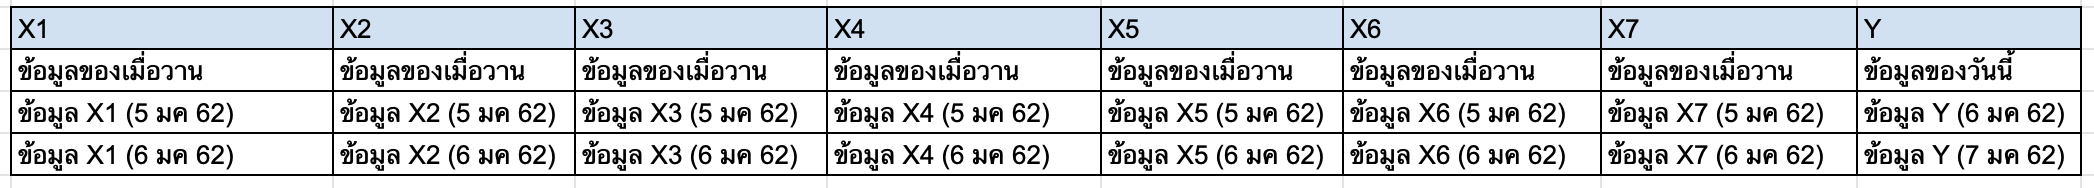

ให้เตรียมข้อมูลลักษณะอากาศของแต่ละวัน (แก้ missing, noise, ฯลฯ ) และสร้างตารางเพื่อทำการทำนาย ปริมาณน้ำฝนสำหรับจังหวัดขอนแก่นของวันถัดไป (ปริมาณน้ำฝนขอนแก่นของวันที่ D+1) จากข้อมูลลักษณะอากาศในจังหวัดต่างๆ (ขอนแก่น,หนองคาย,นครพนม,เลย,สกลนคร) ของวันปัจจุบัน (อุณหภูมิตุ้มแห้งขอนแก่นของวันที่ D,...,ความเร็วลมสกลนครของวันที่ D)

ตัวอย่างตารางที่ต้องการ (Xi มีทั้งหมด 5จังหวัด * 8ลักษณะอากาศ = 40 columns และ Y อีก 1 columns)

In [ ]:
X1_result.head(3) , X2_result.head(3) , X3_result.head(3) , X4_result.head(3) , X5_result.head(3) , X6_result.head(3) , X7_result.head(3)  , X8_result.head(3)

(  year/month  date       X1   province
 0    2011-10     1  1005.47  จ.ขอนแก่น
 1    2011-10     2  1006.65  จ.ขอนแก่น
 2    2011-10     3  1007.49  จ.ขอนแก่น,
   year/month  date    X2   province
 0    2011-10     1    83  จ.ขอนแก่น
 1    2011-10     2  92.0  จ.ขอนแก่น
 2    2011-10     3  86.0  จ.ขอนแก่น,
   year/month  date   X3   province
 0    2011-10     1    3  จ.ขอนแก่น
 1    2011-10     2  2.0  จ.ขอนแก่น
 2    2011-10     3    3  จ.ขอนแก่น,
   year/month  date    X4   province
 0    2011-10     1     9  จ.ขอนแก่น
 1    2011-10     2  10.0  จ.ขอนแก่น
 2    2011-10     3    10  จ.ขอนแก่น,
   year/month  date    X5   province
 0    2011-10     1  24.2  จ.ขอนแก่น
 1    2011-10     2  24.0  จ.ขอนแก่น
 2    2011-10     3  22.9  จ.ขอนแก่น,
   year/month  date    X6   province
 0    2011-10     1  24.8  จ.ขอนแก่น
 1    2011-10     2  23.0  จ.ขอนแก่น
 2    2011-10     3  22.1  จ.ขอนแก่น,
   year/month  date    X7   province
 0    2011-10     1  27.6  จ.ขอนแก่น
 1    2011-10     2  25.

In [ ]:
import pandas as pd


key_columns = ['year/month', 'date', 'province']


X1_selected = X1_result[key_columns + ['X1']]
X2_selected = X2_result[key_columns + ['X2']]
X3_selected = X3_result[key_columns + ['X3']]
X4_selected = X4_result[key_columns + ['X4']]
X5_selected = X5_result[key_columns + ['X5']]
X6_selected = X6_result[key_columns + ['X6']]
X7_selected = X7_result[key_columns + ['X7']]
X8_selected = X8_result[key_columns + ['X8']]


merged_df = pd.merge(X1_selected, X2_selected, on=key_columns, how='outer')
merged_df = pd.merge(merged_df, X3_selected, on=key_columns, how='outer')
merged_df = pd.merge(merged_df, X4_selected, on=key_columns, how='outer')
merged_df = pd.merge(merged_df, X5_selected, on=key_columns, how='outer')
merged_df = pd.merge(merged_df, X6_selected, on=key_columns, how='outer')
merged_df = pd.merge(merged_df, X7_selected, on=key_columns, how='outer')
merged_df = pd.merge(merged_df, X8_selected, on=key_columns, how='outer')

# เปลี่ยนชื่อ column
column_mapping = {'X1': 'ความกด(%)', 'X2': 'ความชื้อสัมพัทธ์(%)', 'X3': 'ความเร็วลม(นอต)', 'X4': 'จำนวนเมฆ(10ส่วน)', 'X5': 'อุณหภูมิจุดน้ำค้าง(°C)', 'X6': 'อุณหภูมิต่ำสุด(°C)', 'X7': 'อุณหภูมิแห้ง(°C)', 'X8': 'ปริมาณฝน(mm)'}
merged_df.rename(columns=column_mapping, inplace=True)

merged_df


,year/month,date,province,ความกด(%),ความชื้อสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิจุดน้ำค้าง(°C),อุณหภูมิต่ำสุด(°C),อุณหภูมิแห้ง(°C),ปริมาณฝน(mm)
0,2011-10,1,จ.ขอนแก่น,1005.47,83,3,9,24.2,24.8,27.6,1.4
1,2011-10,2,จ.ขอนแก่น,1006.65,92.0,2.0,10.0,24.0,23.0,25.6,17.7
2,2011-10,3,จ.ขอนแก่น,1007.49,86.0,3,10,22.9,22.1,25.6,3.0
3,2011-10,4,จ.ขอนแก่น,1008.28,80.0,2.0,8.0,21.9,22.8,25.8,0.0
4,2011-10,5,จ.ขอนแก่น,1009.88,86.0,2.0,10.0,21.7,23.1,24.3,2.2
...,...,...,...,...,...,...,...,...,...,...,...
8520,2022-02,27,จ.หนองคาย,1015.31,62.0,2.0,3,15.8,17.5,23.8,0.0
8521,2022-02,28,จ.หนองคาย,1013.06,65.0,2.0,2,17.8,19,25.4,0.0
8522,2022-02,29,จ.หนองคาย,29.00,29.00,29.00,1,16.6,29.00,29.00,5.3
8523,2022-02,30,จ.หนองคาย,30.00,30.00,30.00,1,14.9,30.00,30.00,5.3


- check ค่า NaN

In [ ]:
rows_with_null = merged_df[merged_df.isnull().any(axis=1)]
rows_with_null


,year/month,date,province,ความกด(%),ความชื้อสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิจุดน้ำค้าง(°C),อุณหภูมิต่ำสุด(°C),อุณหภูมิแห้ง(°C),ปริมาณฝน(mm)
3781,2013-11,31,จ.เลย,31.00,31.00,31.00,0,NaN,31.00,31.00,0.173
4960,2021-10,1,จ.เลย,1008.6,91,1,4,NaN,24.3,NaN,2.8
4961,2021-10,2,จ.เลย,1008.33,88.0,2.0,2,NaN,23.8,NaN,0.0
4962,2021-10,3,จ.เลย,1008.73,87.0,1.0,5,NaN,24.0,NaN,5.6
4963,2021-10,4,จ.เลย,1008.68,86.0,1.0,2,NaN,23.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5110,2022-02,27,จ.เลย,1014.97,74.0,1.0,3,NaN,15.0,NaN,0.0
5111,2022-02,28,จ.เลย,1012.88,72.0,1.0,2,NaN,17.6,NaN,0.0
5112,2022-02,29,จ.เลย,29.00,29.00,29.00,4.93,NaN,29.00,NaN,2.646
5113,2022-02,30,จ.เลย,30.00,30.00,30.00,4.93,NaN,30.00,NaN,2.646


In [ ]:
columns_with_null = merged_df.columns[merged_df.isnull().any()].tolist()
columns_with_null


['อุณหภูมิจุดน้ำค้าง(°C)', 'อุณหภูมิแห้ง(°C)']

- กำจัดค่า NaN เนื่องจากมีค่า NaN ที่ Column X5,X7

In [ ]:
merged_df = merged_df.dropna(subset=['อุณหภูมิจุดน้ำค้าง(°C)', 'อุณหภูมิแห้ง(°C)'])


ลบวันที่ไม่มีอยู่จริงเช่นเดือน กุมพา มี30วัน

- ทำการสร้าง df copy เพื่อไม่ให้กระทบกับข้อมูลหลัก

In [ ]:
df_copy = merged_df.copy()
df_copy

,year/month,date,province,ความกด(%),ความชื้อสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิจุดน้ำค้าง(°C),อุณหภูมิต่ำสุด(°C),อุณหภูมิแห้ง(°C),ปริมาณฝน(mm)
0,2011-10,1,จ.ขอนแก่น,1005.47,83,3,9,24.2,24.8,27.6,1.4
1,2011-10,2,จ.ขอนแก่น,1006.65,92.0,2.0,10.0,24.0,23.0,25.6,17.7
2,2011-10,3,จ.ขอนแก่น,1007.49,86.0,3,10,22.9,22.1,25.6,3.0
3,2011-10,4,จ.ขอนแก่น,1008.28,80.0,2.0,8.0,21.9,22.8,25.8,0.0
4,2011-10,5,จ.ขอนแก่น,1009.88,86.0,2.0,10.0,21.7,23.1,24.3,2.2
...,...,...,...,...,...,...,...,...,...,...,...
8520,2022-02,27,จ.หนองคาย,1015.31,62.0,2.0,3,15.8,17.5,23.8,0.0
8521,2022-02,28,จ.หนองคาย,1013.06,65.0,2.0,2,17.8,19,25.4,0.0
8522,2022-02,29,จ.หนองคาย,29.00,29.00,29.00,1,16.6,29.00,29.00,5.3
8523,2022-02,30,จ.หนองคาย,30.00,30.00,30.00,1,14.9,30.00,30.00,5.3


- ทำการรวม column year/month และ date เข้าด้วยกัน
- ผลที่ได้จะเกิดค่า NaT คือ เป็นวันที่ไม่มีอยู่จริงในเดือนนั้นๆ

In [ ]:
import pandas as pd

df_copy['Date'] = pd.to_datetime(df_copy['year/month'].astype(str) + '-' + df_copy['date'].astype(str), errors='coerce')
# ลบ Column เก่าออก
df_copy = df_copy.drop(['year/month', 'date'], axis=1)
df_copy


,province,ความกด(%),ความชื้อสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิจุดน้ำค้าง(°C),อุณหภูมิต่ำสุด(°C),อุณหภูมิแห้ง(°C),ปริมาณฝน(mm),Date
0,จ.ขอนแก่น,1005.47,83,3,9,24.2,24.8,27.6,1.4,2011-10-01
1,จ.ขอนแก่น,1006.65,92.0,2.0,10.0,24.0,23.0,25.6,17.7,2011-10-02
2,จ.ขอนแก่น,1007.49,86.0,3,10,22.9,22.1,25.6,3.0,2011-10-03
3,จ.ขอนแก่น,1008.28,80.0,2.0,8.0,21.9,22.8,25.8,0.0,2011-10-04
4,จ.ขอนแก่น,1009.88,86.0,2.0,10.0,21.7,23.1,24.3,2.2,2011-10-05
...,...,...,...,...,...,...,...,...,...,...
8520,จ.หนองคาย,1015.31,62.0,2.0,3,15.8,17.5,23.8,0.0,2022-02-27
8521,จ.หนองคาย,1013.06,65.0,2.0,2,17.8,19,25.4,0.0,2022-02-28
8522,จ.หนองคาย,29.00,29.00,29.00,1,16.6,29.00,29.00,5.3,NaT
8523,จ.หนองคาย,30.00,30.00,30.00,1,14.9,30.00,30.00,5.3,NaT


- ทำการลบ row ที่มีค่า NaT ใน column combined_date

In [ ]:
# Drop rows with NaN values in the 'combined_date' column
df_cleaned = df_copy.dropna(subset=['Date'])

# Display the cleaned DataFrame
df_cleaned


,province,ความกด(%),ความชื้อสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิจุดน้ำค้าง(°C),อุณหภูมิต่ำสุด(°C),อุณหภูมิแห้ง(°C),ปริมาณฝน(mm),Date
0,จ.ขอนแก่น,1005.47,83,3,9,24.2,24.8,27.6,1.4,2011-10-01
1,จ.ขอนแก่น,1006.65,92.0,2.0,10.0,24.0,23.0,25.6,17.7,2011-10-02
2,จ.ขอนแก่น,1007.49,86.0,3,10,22.9,22.1,25.6,3.0,2011-10-03
3,จ.ขอนแก่น,1008.28,80.0,2.0,8.0,21.9,22.8,25.8,0.0,2011-10-04
4,จ.ขอนแก่น,1009.88,86.0,2.0,10.0,21.7,23.1,24.3,2.2,2011-10-05
...,...,...,...,...,...,...,...,...,...,...
8517,จ.หนองคาย,1019.23,66.0,2.0,1,13.2,14.0,20.3,0.0,2022-02-24
8518,จ.หนองคาย,1018.46,68.0,2.0,1,14.3,13.9,20.7,0.0,2022-02-25
8519,จ.หนองคาย,1016.68,65.0,1.0,0,15.2,15.0,22.7,0.0,2022-02-26
8520,จ.หนองคาย,1015.31,62.0,2.0,3,15.8,17.5,23.8,0.0,2022-02-27


Check Null

In [ ]:
rows_with_null = df_cleaned[df_cleaned.isnull().any(axis=1)]
rows_with_null


,province,ความกด(%),ความชื้อสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิจุดน้ำค้าง(°C),อุณหภูมิต่ำสุด(°C),อุณหภูมิแห้ง(°C),ปริมาณฝน(mm),Date


# ตัวอย่างตารางที่ต้องการ (Xi มีทั้งหมด 5จังหวัด * 8ลักษณะอากาศ = 40 columns และ Y อีก 1 columns)

In [ ]:
dfnew = df_cleaned.copy()

In [ ]:
import pandas as pd

# Assuming your dataframe is named dfnew
# ...

# List of provinces and weather characteristics
provinces = ['จ.ขอนแก่น', 'จ.หนองคาย', 'จ.นครพนม', 'จ.เลย', 'จ.สกลนคร']
weather_characteristics = ['ความกด(%)', 'ความชื้อสัมพัทธ์(%)', 'ความเร็วลม(นอต)', 'จำนวนเมฆ(10ส่วน)',
                            'อุณหภูมิจุดน้ำค้าง(°C)', 'อุณหภูมิต่ำสุด(°C)', 'อุณหภูมิแห้ง(°C)', 'ปริมาณฝน(mm)']

# Group by 'Date' and 'province' to optimize data extraction
grouped_data = dfnew.groupby(['Date', 'province'])

# Create an empty list to store dataframes for each date
dfs = []

# Iterate over unique dates in the grouped data
for date, group in grouped_data:
    date_data = {'Date': date[0]}

    # Iterate over provinces and weather characteristics to populate the new dataframe
    for province in provinces:
        for characteristic in weather_characteristics:
            # Extract the relevant data from the grouped data
            value = group[group['province'] == province][characteristic].values
            if len(value) > 0:
                date_data[f'{province}+{characteristic}'] = value[0]
            else:
                date_data[f'{province}+{characteristic}'] = None

    # Append the data for the current date to the list
    dfs.append(pd.DataFrame(date_data, index=[0]))

# Concatenate the list of dataframes into the final result dataframe
result_df = pd.concat(dfs, ignore_index=True)

# Display the result dataframe
result_df


,Date,จ.ขอนแก่น+ความกด(%),จ.ขอนแก่น+ความชื้อสัมพัทธ์(%),จ.ขอนแก่น+ความเร็วลม(นอต),จ.ขอนแก่น+จำนวนเมฆ(10ส่วน),จ.ขอนแก่น+อุณหภูมิจุดน้ำค้าง(°C),จ.ขอนแก่น+อุณหภูมิต่ำสุด(°C),จ.ขอนแก่น+อุณหภูมิแห้ง(°C),จ.ขอนแก่น+ปริมาณฝน(mm),จ.หนองคาย+ความกด(%),...,จ.เลย+อุณหภูมิแห้ง(°C),จ.เลย+ปริมาณฝน(mm),จ.สกลนคร+ความกด(%),จ.สกลนคร+ความชื้อสัมพัทธ์(%),จ.สกลนคร+ความเร็วลม(นอต),จ.สกลนคร+จำนวนเมฆ(10ส่วน),จ.สกลนคร+อุณหภูมิจุดน้ำค้าง(°C),จ.สกลนคร+อุณหภูมิต่ำสุด(°C),จ.สกลนคร+อุณหภูมิแห้ง(°C),จ.สกลนคร+ปริมาณฝน(mm)
0,2011-10-01,1005.47,83,3,9,24.2,24.8,27.6,1.4,None,...,None,None,None,None,None,None,None,None,None,None
1,2011-10-01,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,2011-10-01,None,None,None,None,None,None,None,None,None,...,None,None,1005.84,87,1,9,24.5,24.5,26.9,84.8
3,2011-10-01,None,None,None,None,None,None,None,None,1005.34,...,None,None,None,None,None,None,None,None,None,None
4,2011-10-01,None,None,None,None,None,None,None,None,None,...,26.3,21.6,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8164,2022-02-27,None,None,None,None,None,None,None,None,1015.31,...,None,None,None,None,None,None,None,None,None,None
8165,2022-02-28,1013.04,62.0,2.0,2.0,17.5,28.00,25.9,1.674,None,...,None,None,None,None,None,None,None,None,None,None
8166,2022-02-28,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8167,2022-02-28,None,None,None,None,None,None,None,None,None,...,None,None,1012.89,68.0,2.0,0,17.3,28.00,24.4,1.437
